In [1]:
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

In [19]:
import warnings
import os
import umap.plot
from umap import umap_
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

warnings.filterwarnings('ignore')

In [3]:
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\test.csv
./data\train.csv


In [4]:
PATH = "./data/"

In [5]:
train_df = pd.read_csv(PATH + "train.csv")

In [6]:
test_df = pd.read_csv(PATH + "test.csv")

In [7]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
train_df['Arrival Delay in Minutes'].fillna(0.0, inplace=True)
test_df['Arrival Delay in Minutes'].fillna(0.0, inplace=True)

train_df.drop(columns=['id'], inplace=True)

In [9]:
train_df.select_dtypes(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [10]:
train_df['Gender'] = train_df['Gender'].map({'Female':0, 'Male':1})
train_df['Customer Type'] = train_df['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})
train_df['Type of Travel'] = train_df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
train_df['Class'] = train_df['Class'].map({'Eco':1, 'Eco Plus':2, 'Business':3})
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

In [11]:
test_df['Gender'] = test_df['Gender'].map({'Female':0, 'Male':1})
test_df['Customer Type'] = test_df['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})
test_df['Type of Travel'] = test_df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
test_df['Class'] = test_df['Class'].map({'Eco':1, 'Eco Plus':2, 'Business':3})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

In [12]:
train_df.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,1,13,0,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,0,25,1,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,0,1,26,1,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,0,1,25,1,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,1,1,61,1,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [13]:
train_df.shape

(103904, 24)

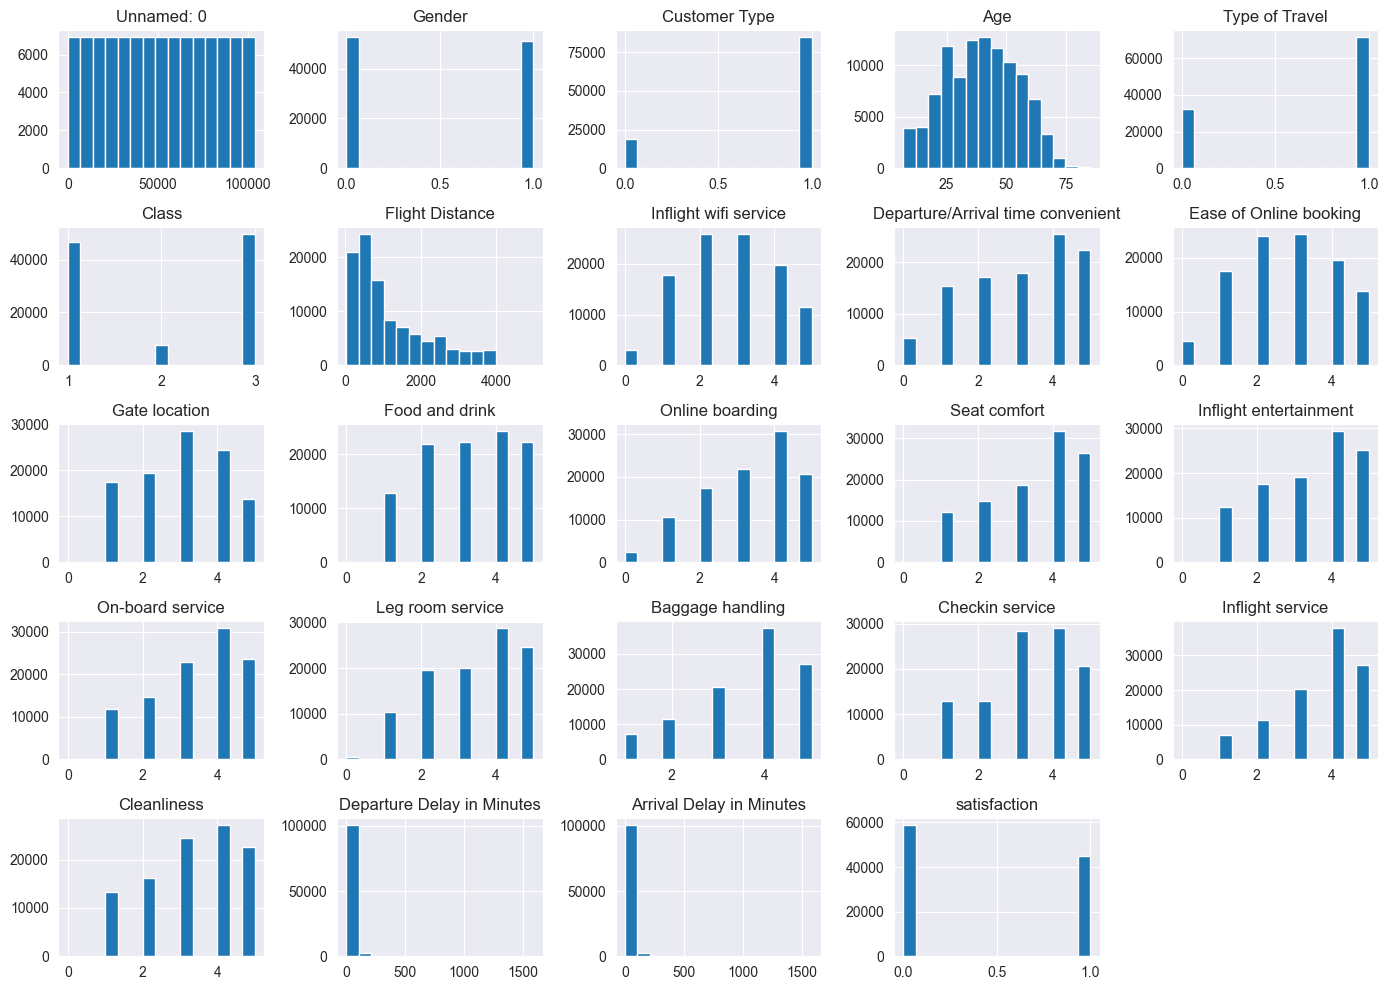

In [14]:
train_df.hist(figsize=(14,10), bins=15)
plt.tight_layout()
plt.show()

In [15]:
#We first need to scale the data. We don't have negative values so we can use standard scaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)

In [16]:
umap_data = umap_.UMAP(n_neighbors=100, n_components=2, metric='euclidean', n_epochs=100, learning_rate=0.1, init='spectral',
                 min_dist=0.1, spread=1.0, low_memory=False, set_op_mix_ratio=1.0, local_connectivity=1,
                 repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, random_state=3,
                 angular_rp_forest=False, target_n_neighbors=-1, transform_seed=3, verbose=False, unique=False)

In [17]:
umap_fit = umap_data.fit(train_scaled)

<Axes: >

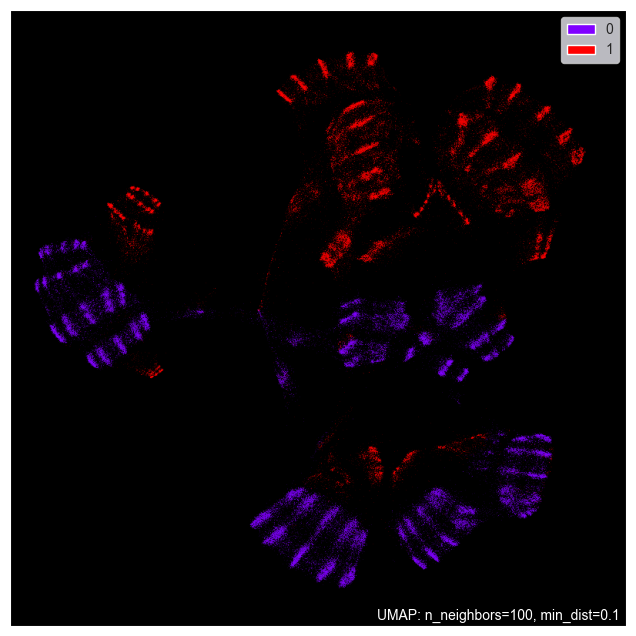

In [20]:
umap.plot.points(umap_fit, labels=train_df.satisfaction, theme='fire')